# TRAINING SEGMENTATION MODEL

In [ ]:
!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.8.0/index.html

!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.3 MB/s eta 0:14:13tcmalloc: large alloc 1147494400 bytes == 0x55be7b392000 @  0x7f3526ef2615 0x55be4140b4cc 0x55be414eb47a 0x55be4140e2ed 0x55be414ffe1d 0x55be41481e99 0x55be4147c9ee 0x55be4140fbda 0x55be41481d00 0x55be4147c9ee 0x55be4140fbda 0x55be4147e737 0x55be41500c66 0x55be4147ddaf 0x55be41500c66 0x55be4147ddaf 0x55be41500c66 0x55be4147ddaf 0x55be41410039 0x55be41453409 0x55be4140ec52 0x55be41481c25 0x55be4147c9ee 0x55be4140fbda 0x55be4147e737 0x55be4147c9ee 0x55be4140fbda 0x55be4147d915 0x55be4140fafa 0x55be4147dc0d 0x55be4147c9ee
     |█████████████████               | 1055.7 MB 1.3 MB/s eta 0:12:19tcmalloc: large alloc 1434370048 bytes == 0x55bebf9e8000 @  0x7f3526ef2615 0x55be4140b4cc 0x55be414eb47a 0x55be4140e2ed 0x55be414ffe1d 0x55be41481e99 0x55be4147c9ee 0x55be4140fbda 0x55be41481d00 0x55be4147c9ee 0x55be4140fbda 0x55be4147e737 0x55be41500c66 0x55be4147dd

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.8.0+cu111 True
0.18.0


LOAD DATASET, .PTH FILE AND CONFIG FILE


1.   16IT9MvOfgk8gbj3T8xuHBBI-oLu9Nu2X : ID CỦA PTH FILE
2.   1Y58Y-ilCdlo9Nk4uitQBK5fC9ixAH184 : ID CỦA DATASET



In [ ]:
!mkdir checkpoints
pth_file = !gdown --id 16IT9MvOfgk8gbj3T8xuHBBI-oLu9Nu2X
pth_name = pth_file[2].split(' ')[1].split('/')[-1]
pth_name

['Downloading...',
 'From: https://drive.google.com/uc?id=16IT9MvOfgk8gbj3T8xuHBBI-oLu9Nu2X',
 'To: /content/mmsegmentation/deeplabv3_r101-d8_480x480_40k_pascal_context_59_20210416_110332-cb08ea46.pth',
 '',
 '  0% 0.00/349M [00:00<?, ?B/s]',
 '  3% 12.1M/349M [00:00<00:02, 120MB/s]',
 ' 12% 42.5M/349M [00:00<00:02, 147MB/s]',
 ' 21% 74.4M/349M [00:00<00:01, 175MB/s]',
 ' 31% 107M/349M [00:00<00:01, 203MB/s] ',
 ' 37% 130M/349M [00:00<00:01, 187MB/s]',
 ' 45% 157M/349M [00:00<00:00, 205MB/s]',
 ' 52% 180M/349M [00:00<00:00, 213MB/s]',
 ' 58% 204M/349M [00:00<00:00, 219MB/s]',
 ' 65% 227M/349M [00:00<00:00, 220MB/s]',
 ' 72% 252M/349M [00:01<00:00, 228MB/s]',
 ' 79% 277M/349M [00:01<00:00, 233MB/s]',
 ' 87% 304M/349M [00:01<00:00, 241MB/s]',
 ' 94% 329M/349M [00:01<00:00, 244MB/s]',
 '100% 349M/349M [00:01<00:00, 240MB/s]']

In [ ]:
# need check
!mv /content/mmsegmentation/deeplabv3_r101-d8_480x480_40k_pascal_context_59_20210416_110332-cb08ea46.pth /content/mmsegmentation/checkpoints/deeplabv3_r101-d8_480x480_40k_pascal_context_59_20210416_110332-cb08ea46.pth

In [ ]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

config_file = 'configs/deeplabv3/deeplabv3_r101-d8_480x480_40k_pascal_context_59.py'
checkpoint_file = 'checkpoints/deeplabv3_r101-d8_480x480_40k_pascal_context_59_20210416_110332-cb08ea46.pth'

In [ ]:
%cd mmsegmentation
!gdown --id 1Y58Y-ilCdlo9Nk4uitQBK5fC9ixAH184 
!mkdir dataset
!unzip /content/mmsegmentation/27102021.zip -d dataset

[Errno 2] No such file or directory: 'mmsegmentation'
/content/mmsegmentation
Downloading...
From: https://drive.google.com/uc?id=1Y58Y-ilCdlo9Nk4uitQBK5fC9ixAH184
To: /content/mmsegmentation/27102021.zip
100% 86.8M/86.8M [00:00<00:00, 236MB/s]


SHOW SAMPLE OF DATASET

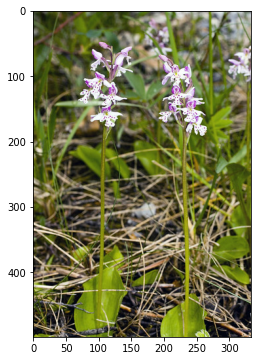

In [ ]:
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/mmsegmentation/dataset/images/10.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

CONVERT TO COCO FORMAT

In [ ]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## For visualizing results
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

dataDir='/content/mmsegmentation/dataset'
dataType='default'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
labels_dir = '/content/mmsegmentation/dataset/labels'


if os.path.exists(labels_dir):
  files = glob.glob(labels_dir + '/*')
  for f in files:
      os.remove(f)
else:
  try:
      os.makedirs(labels_dir, exist_ok = True)
      print("Directory '%s' created successfully" %labels_dir)
  except OSError as error:
      print("Directory '%s' can not be created")

# initialize the COCO api for instance annotations
coco=COCO(annFile)

def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"

# get all images containing given categories, select one at random
filterClasses = ['orchid']
catIds = coco.getCatIds(catNms=filterClasses)
imgIds = coco.getImgIds(catIds=catIds)
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)
len_imgs = len(imgIds)
print("Number of images containing all required classes:", len(imgIds))
      
exception_files = []

input_img_paths = []
target_img_paths = []

for imgId in range(len_imgs):
  img = coco.loadImgs(imgIds[imgId])[0]
  file_name = img['file_name']
  file_path = '{}/images/{}'.format(dataDir, file_name)
  save = True

  # I = io.imread('{}/images/{}/{}'.format(dataDir, dataType, file_name))/255.0
  I = io.imread(file_path)/255.0

  annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
  anns = coco.loadAnns(annIds)
  # coco.showAnns(anns)

  mask = np.zeros((img['height'],img['width']))


  for i in range(len(anns)):
      className = getClassName(anns[i]['category_id'], cats)
      pixel_value = filterClasses.index(className)+1
      try:          
        mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)      
        
      except:
        print("An exception occurred with file : {}".format(file_name))
        exception_files.append('/content/mmsegmentation/dataset/images/' + file_name)
        save = False
  if save:
    mask_path = '{}/{}.regions'.format(labels_dir, file_name.split('.')[0])
    np.savetxt(mask_path, mask, fmt='%d', delimiter=' ')
    input_img_paths.append(file_path)
    target_img_paths.append(mask_path)

Directory '/content/mmsegmentation/dataset/labels' created successfully
loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
Number of images containing all required classes: 1524
An exception occurred with file : 4127_1.jpg


In [ ]:
import os.path as osp
import numpy as np
from PIL import Image
# convert dataset annotation to semantic segmentation map
data_root = '/content/mmsegmentation/dataset'
img_dir = 'images'
ann_dir = 'labels'
# define class and plaette for better visualization
classes = ('background', 'orchid')
palette = [[128, 128, 128], [129, 127, 38]]
for file in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.regions'):
  seg_map = np.loadtxt(osp.join(data_root, ann_dir, file)).astype(np.uint8)
  seg_img = Image.fromarray(seg_map).convert('P')
  seg_img.putpalette(np.array(palette, dtype=np.uint8))
  seg_img.save(osp.join(data_root, ann_dir, file.replace('.regions', 
                                                         '.png')))

In [ ]:
# split train/val set randomly
split_dir = 'splits'
mmcv.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])

SHOW MASK OF SAMPLE

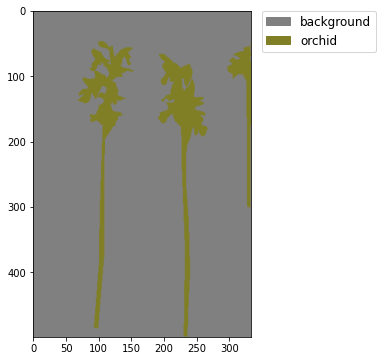

In [ ]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
img = Image.open('/content/mmsegmentation/dataset/labels/10.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(len(classes))]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

FINTUNE BY MMSEGMATATION MODEL

In [ ]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module()
class OrchidDataset(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, split, **kwargs):
    super().__init__(img_suffix='.jpg', seg_map_suffix='.png', 
                     split=split, **kwargs)
    assert osp.exists(self.img_dir) and self.split is not None

    

In [ ]:
from mmcv import Config
cfg = Config.fromfile(config_file)

In [ ]:
from mmseg.apis import set_random_seed

# Since we use ony one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 2
cfg.model.auxiliary_head.num_classes = 2

# Modify dataset type and path
cfg.dataset_type = 'OrchidDataset'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu=8

cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (256, 256)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(320, 240), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(320, 240),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]


cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'splits/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'splits/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'splits/val.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = checkpoint_file

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.runner.max_iters = 2000
cfg.log_config.interval = 10
cfg.evaluation.interval = 2000
cfg.checkpoint_config.interval = 2000

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='open-mmlab://resnet101_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='ASPPHead',
        in_channels=2048,
        in_index=3,
        channels=512,
        dilations=(1, 12, 24, 36),
        dropout_ratio=0.1,
        num_classes=2,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0)),
    auxiliary_head=dict(
        type='FCNHead',
        in_channels=1024,
        in_index=2,
        channels=256,
        num_convs=1,
        concat_inp

In [ ]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor


# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_segmentor(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

/usr/local/lib/python3.7/dist-packages/mmcv/utils/misc.py:334: UserWarning: "flip_ratio" is deprecated in `RandomFlip.__init__`, please use "prob" instead
  f'"{src_arg_name}" is deprecated in '
2021-10-29 00:15:35,921 - mmseg - INFO - Loaded 1218 images
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2021-10-29 00:15:44,477 - mmseg - INFO - Loaded 305 images
2021-10-29

SAVE SEGMENT MODEL

In [ ]:
import joblib
filename = '/gdrive/MyDrive/KLTN/SOF/finalized_model.sav'
joblib.dump(model, filename)

# FEATURES EXTRACTION

In [ ]:
!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.8.0/index.html

!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.2 MB/s eta 0:15:43tcmalloc: large alloc 1147494400 bytes == 0x55c0e76ae000 @  0x7fa4fb372615 0x55c0ae7dd4cc 0x55c0ae8bd47a 0x55c0ae7e02ed 0x55c0ae8d1e1d 0x55c0ae853e99 0x55c0ae84e9ee 0x55c0ae7e1bda 0x55c0ae853d00 0x55c0ae84e9ee 0x55c0ae7e1bda 0x55c0ae850737 0x55c0ae8d2c66 0x55c0ae84fdaf 0x55c0ae8d2c66 0x55c0ae84fdaf 0x55c0ae8d2c66 0x55c0ae84fdaf 0x55c0ae7e2039 0x55c0ae825409 0x55c0ae7e0c52 0x55c0ae853c25 0x55c0ae84e9ee 0x55c0ae7e1bda 0x55c0ae850737 0x55c0ae84e9ee 0x55c0ae7e1bda 0x55c0ae84f915 0x55c0ae7e1afa 0x55c0ae84fc0d 0x55c0ae84e9ee
     |█████████████████               | 1055.7 MB 1.3 MB/s eta 0:11:45tcmalloc: large alloc 1434370048 bytes == 0x55c12bd04000 @  0x7fa4fb372615 0x55c0ae7dd4cc 0x55c0ae8bd47a 0x55c0ae7e02ed 0x55c0ae8d1e1d 0x55c0ae853e99 0x55c0ae84e9ee 0x55c0ae7e1bda 0x55c0ae853d00 0x55c0ae84e9ee 0x55c0ae7e1bda 0x55c0ae850737 0x55c0ae8d2c66 0x55c0ae84fd

In [ ]:
from google.colab import drive
from tqdm import tqdm
import mmcv
import matplotlib.pyplot as plt

# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)
drive.mount('/gdrive')

1.8.0+cu111 True
0.18.0
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


/content/mmsegmentation/mmseg/models/segmentors/base.py:264: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 576x432 with 0 Axes>

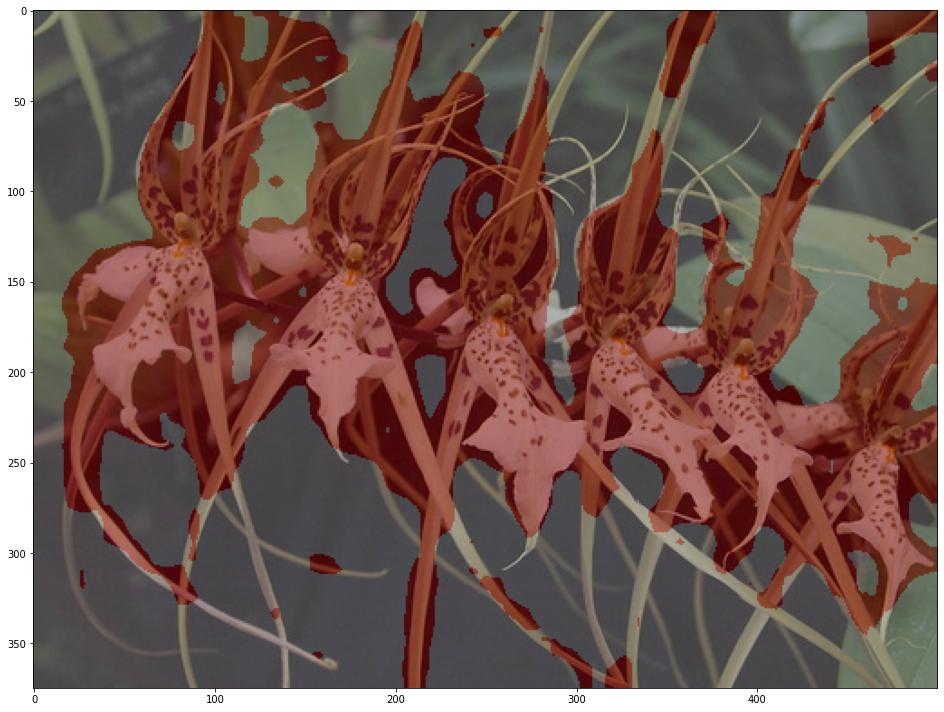

In [ ]:
import joblib
from mmcv import Config
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

config_file = 'configs/deeplabv3/deeplabv3_r101-d8_480x480_40k_pascal_context_59.py'
cfg = Config.fromfile(config_file)

img = mmcv.imread('/gdrive/MyDrive/KLTN/dataset/OCD_Harvard/Species_Classifier/test/6/170.jpg')

filename = '/gdrive/MyDrive/KLTN/SOF/finalized_model.sav'
model = joblib.load(filename)
model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
palette = [[128, 128, 128], [128,0,0]]
show_result_pyplot(model, img, result, palette)

In [ ]:
# need to write in one function
img = mmcv.imread('/content/mmsegmentation/dataset/images/10.jpg')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
palette = [[128, 128, 128], [128,0,0]]
show_result_pyplot(model, img, result, palette)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
train_folder = '/gdrive/MyDrive/KLTN/dataset/OCD_Harvard/Species_Classifier/train'
test_folder = '/gdrive/MyDrive/KLTN/dataset/OCD_Harvard/Species_Classifier/test'
val_folder = '/gdrive/MyDrive/KLTN/dataset/OCD_Harvard/Species_Classifier/val'

In [ ]:
img = mmcv.imread('/gdrive/MyDrive/KLTN/dataset/OCD_Harvard/Species_Classifier/test/6/170.jpg')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
palette = [[128, 128, 128], [128,0,0]]
show_result_pyplot(model, img, result, palette)

In [ ]:
newfoler_test = '/gdrive/MyDrive/KLTN/dataset/OCD_Harvard/SegData/test'
newfoler_train = '/gdrive/MyDrive/KLTN/dataset/OCD_Harvard/SegData/train'
newfoler_val = '/gdrive/MyDrive/KLTN/dataset/OCD_Harvard/SegData/val'

In [ ]:
import glob
import os

name_classes = glob.glob(train_folder + '/*')
for name_class in name_classes:
  class_name = name_class.split('/')[-1]
  if not os.path.exists(newfoler_train + '/' + class_name):
    os.mkdir(newfoler_train + '/' + class_name)

  images = glob.glob(name_class + '/*')

  for img_path in images:
    img_name = img_path.split('/')[-1]

    img = mmcv.imread(img_path)

    model.cfg = cfg
    result = inference_segmentor(model, img)

    for i in range(result[0].shape[0]):
      for j in range(result[0].shape[1]):
        if result[0][i][j] == 0:
          img[i][j] = [0, 0, 0]
    try:
      cv2.imwrite(newfoler_train + '/' + class_name + '/' + img_name, img)
    except:
      print(newfoler_train + '/' + class_name + '/' + img_name)

In [ ]:
import glob
import os

name_classes = glob.glob(test_folder + '/*')
for name_class in name_classes:
  class_name = name_class.split('/')[-1]
  if not os.path.exists(newfoler_test + '/' + class_name):
    os.mkdir(newfoler_test + '/' + class_name)

  images = glob.glob(name_class + '/*')

  for img_path in images:
    img_name = img_path.split('/')[-1]

    img = mmcv.imread(img_path)

    model.cfg = cfg
    result = inference_segmentor(model, img)

    for i in range(result[0].shape[0]):
      for j in range(result[0].shape[1]):
        if result[0][i][j] == 0:
          img[i][j] = [0, 0, 0]
    try:
      cv2.imwrite(newfoler_test + '/' + class_name + '/' + img_name, img)
    except:
      print(newfoler_test + '/' + class_name + '/' + img_name)
  print('Class {} done'.format(class_name))

In [ ]:
import glob
import os

name_classes = glob.glob(val_folder + '/*')
for name_class in name_classes:
  class_name = name_class.split('/')[-1]
  if not os.path.exists(newfoler_val + '/' + class_name):
    os.mkdir(newfoler_val + '/' + class_name)

  images = glob.glob(name_class + '/*')

  for img_path in images:
    img_name = img_path.split('/')[-1]

    img = mmcv.imread(img_path)

    model.cfg = cfg
    result = inference_segmentor(model, img)

    for i in range(result[0].shape[0]):
      for j in range(result[0].shape[1]):
        if result[0][i][j] == 0:
          img[i][j] = [0, 0, 0]
    try:
      cv2.imwrite(newfoler_val + '/' + class_name + '/' + img_name, img)
    except:
      print(newfoler_val + '/' + class_name + '/' + img_name)
  print('Class {} done'.format(class_name))

EXTRACT WITH DCNN

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from google.colab import drive
from tensorflow import keras
import sys
drive.mount('/content/drive')
train_dir = '/content/drive/MyDrive/KLTN/dataset/OCD_Harvard/SegData/train'
val_dir = '/content/drive/MyDrive/KLTN/dataset/OCD_Harvard/SegData/validation'
test_dir = '/content/drive/MyDrive/KLTN/dataset/OCD_Harvard/SegData/test'

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

val_dataset = image_dataset_from_directory(val_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

test_dataset = image_dataset_from_directory(test_dir,
                                            shuffle=True,
                                            batch_size=BATCH_SIZE,
                                            image_size=IMG_SIZE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5119 files belonging to 156 classes.
Found 1235 files belonging to 156 classes.
Found 798 files belonging to 156 classes.


In [ ]:
import tensorflow as tf

models = {
    'DenseNet121': {
        'model': tf.keras.applications.DenseNet121(include_top=False, weights='imagenet',  pooling='avg'),
        'input_processing': tf.keras.applications.densenet.preprocess_input,        
    },
    'DenseNet169': {
        'model': tf.keras.applications.DenseNet169(include_top=False, weights='imagenet',  pooling='avg'),
        'input_processing': tf.keras.applications.densenet.preprocess_input,       
    },
    'DenseNet201': {
        'model': tf.keras.applications.DenseNet201(include_top=False, weights='imagenet', pooling='avg'),
        'input_processing': tf.keras.applications.densenet.preprocess_input,        
    },
    'EfficientNetB0': {
        'model': tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', pooling='avg'),
        'input_processing': tf.keras.applications.efficientnet.preprocess_input,        
    },
    'MobileNet': {
        'model': tf.keras.applications.MobileNet(include_top=False, weights='imagenet', pooling='avg'),
        'input_processing': tf.keras.applications.mobilenet.preprocess_input,       
    },
    'MobileNetV2': {
        'model': tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', pooling='avg'),
        'input_processing': tf.keras.applications.mobilenet_v2.preprocess_input,
    },
    'InceptionV3': {
        'model': tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', pooling='avg'),
        'input_processing': tf.keras.applications.inception_v3.preprocess_input,        
    },      
    'MobileNetV3Large': {
        'model': tf.keras.applications.MobileNetV3Large(include_top=False, weights='imagenet', pooling='avg'),
        'input_processing': tf.keras.applications.mobilenet_v3.preprocess_input
    },
    'MobileNetV3Small': {
        'model': tf.keras.applications.MobileNetV3Small(include_top=False, weights='imagenet',  pooling='avg'),
        'input_processing': tf.keras.applications.mobilenet_v3.preprocess_input,        
    },
    'NASNetLarge': {
        'model': tf.keras.applications.MobileNetV3Small(include_top=False, weights='imagenet',  pooling='avg'),
        'input_processing': tf.keras.applications.nasnet.preprocess_input,
    },
    'NASNetMobile': {
        'model': tf.keras.applications.NASNetMobile(include_top=False, weights='imagenet', pooling='avg'),
        'input_processing': tf.keras.applications.nasnet.preprocess_input,        
    },
    'VGG16': {
        'model': tf.keras.applications.VGG16(include_top=False, weights='imagenet', pooling='avg'),
        'input_processing': tf.keras.applications.vgg16.preprocess_input,             
    },
    'VGG19': {
        'model': tf.keras.applications.VGG19(include_top=False, weights='imagenet', pooling='avg'),
        'input_processing': tf.keras.applications.vgg19.preprocess_input,        
    },
    'Xception': {
        'model': tf.keras.applications.Xception(include_top=False, weights='imagenet', pooling='avg'),
        'input_processing': tf.keras.applications.xception.preprocess_input,        
    },
    'ResNet101': {
        'model': tf.keras.applications.ResNet101(include_top=False, weights='imagenet', pooling='avg'),
        'input_processing': tf.keras.applications.resnet.preprocess_input,       
    },
    'ResNet50': {
        'model': tf.keras.applications.ResNet50(include_top=False, weights='imagenet', pooling='avg'),
        'input_processing': tf.keras.applications.resnet50.preprocess_input,        
    },
    'ResNet152': {
        'model': tf.keras.applications.ResNet152(include_top=False, weights='imagenet', pooling='avg'),
        'input_processing': tf.keras.applications.resnet.preprocess_input,        
    },

}

234708992/234698864 [==============================] - 2s 0us/step


In [ ]:
import datetime
def extract_features(dataset, model, preprocess_input):
  x = []
  y = []
  begin = time.time()

  # num_batches = tf.data.experimental.cardinality(dataset)
  # print("{:36s} | {:23s} | {:20s} | {:20s} | {:20s}".format('Batch', 'Batch info', 'X shape (after extract)', 'Y shape (after extract)', 'Time extract'))
  # return
  for batch_id, element in enumerate(tqdm(dataset)):         
    image, label = element    
    # print("Start on batch {:4s} labels at {} (with {} images and {} label) : ".format(str(batch_id) ,datetime.datetime.now(), len(image), len(label)), end='')
    # batch_info = "{:4s} (at {})".format(str(batch_id) ,datetime.datetime.now())
    # batch_image_label = "{:4d} images,{:4d} labels".format(len(image), len(label))
    # print("{:20s} | {:15s} |".format(batch_info, batch_image_label), end=' ')
    # continue
    time_extraction = time.time()    
    time_model_inferen = time.time()
    X = preprocess_input(image) 
    X = model.predict(X)
    time_model_inferen_stop = time.time() - time_model_inferen
    x.append(X)       
    y.extend(label.numpy())
    x_shape = (len(x), len(x[0]), len(x[0][0]))
    y_shape = (len(y),)    
    # print("Done in {:.4f} s (model inference : {:.4f}) (with {} images and {} label)".format(time.time() - time_extraction, time_model_inferen_stop, x_shape, y_shape))    
    xshape_info = "{}".format(X.shape)
    yshape_info = "{}".format(np.array(y).shape)
    time_excute = "{:.4f}".format(time.time() - time_extraction)
    # print("{:23s} | {:23s} | {:20s}".format(xshape_info, yshape_info, time_excute, end='\n'))
    # if batch_id == 2:
      # break
    # return np.vstack(x), np.array(y)  
  print("Done extraction in {:.4f} s ".format(time.time() - begin))   
  print('==========================================================') 
  
  # unique, counts = np.unique(y, return_counts=True)
  # for i in range(len(unique)):
  #   print('Class {} \t: {} samples'.format(unique[i], counts[i]))
  
  return np.vstack(x), np.array(y)  

In [ ]:
from sklearn import datasets, svm, metrics
from sklearn.svm import LinearSVC
import time


def features_extraction(dataset, type_dataset, models, modelname):
  #get model
  preprocess_input = models[modelname]['input_processing']
  model = models[modelname]['model']
  print('Start extraction with {}'.format(model.name.upper()))
  # Extraction dataset
  print('\n[On {} dataset]'.format(type_dataset).upper())  
  time_start_extraction = time.time()    
  X_train, y_train = extract_features(dataset, model, preprocess_input)
  time_stop_extraction = time.time() - time_start_extraction

  # result
  print('Done extraction in {:.4f} s'.format(time_stop_extraction))
  print('{} feature shape x : {}, y : {}'.format(type_dataset, X_train.shape, y_train.shape))
  return X_train, y_train

In [ ]:
import joblib
from numpy import asarray
from numpy import save
from numpy import savetxt

import os

dirfolder = '/content/drive/MyDrive/KLTN/Full_Experiments/'
if not os.path.exists(dirfolder):
  os.mkdir(dirfolder)

modelnames = [x for x in models.keys()]
print(modelnames)

['DenseNet121', 'DenseNet169', 'DenseNet201', 'EfficientNetB0', 'MobileNet', 'MobileNetV2', 'InceptionV3', 'MobileNetV3Large', 'MobileNetV3Small', 'NASNetLarge', 'NASNetMobile', 'VGG16', 'VGG19', 'Xception', 'ResNet101', 'ResNet50', 'ResNet152']


In [ ]:
train_dataset_stable = []
test_dataset_stable = []
val_dataset_stable = []
print("Start cloning.....")
time_clone = time.time()
# clone dataset

for batch_id, element in enumerate(tqdm(train_dataset)): 
  train_dataset_stable.append(element)

# clone dataset
for batch_id, element in enumerate(tqdm(test_dataset)): 
  test_dataset_stable.append(element)

# clone dataset
for batch_id, element in enumerate(tqdm(val_dataset)): 
  val_dataset_stable.append(element)
print("Done clone in {}".format(time.time() - time_clone))  
print('train_dataset_stable shape : ({}, {})'.format(len(train_dataset_stable), len(train_dataset_stable[0])))
print('test_dataset_stable shape : ({}, {})'.format(len(test_dataset_stable), len(test_dataset_stable[0])))
print('val_dataset_stable shape : ({}, {})'.format(len(val_dataset_stable), len(val_dataset_stable[0])))

Start cloning.....


100%|██████████| 39/39 [03:05<00:00,  4.77s/it]

Done clone in 919.7985343933105
train_dataset_stable shape : (160, 2)
test_dataset_stable shape : (25, 2)
val_dataset_stable shape : (39, 2)


In [ ]:
harvard_experiments_folder = []
for with_model in modelnames:
  # extract features  
  X_train, y_train = features_extraction(train_dataset_stable, 'Train', models, with_model)
  X_val, y_val = features_extraction(val_dataset_stable, 'Val', models, with_model)
  X_test, y_test = features_extraction(test_dataset_stable, 'Test', models, with_model)

  X_train = np.append(X_train, X_val, axis=0)
  y_train = np.append(y_train, y_val, axis=0)
  
  print("\nSaving files.....")
  #save model
  foldername = dirfolder + 'harvard_mefoc_model_' + with_model.lower()
  if not os.path.exists(foldername):
    os.mkdir(foldername)

  harvard_experiments_folder.append(foldername)

  #save data to test
  # x_train = np.around(X_train)
  x_train_filename = foldername + '/x_train.npy'
  save(x_train_filename, X_train)
  # np.savetxt(foldername + "/foo.csv", x_train, delimiter=",")
  print('Save file {} done!'.format(x_train_filename))

  # y_train = np.around(y_train)
  y_train_filename = foldername + '/y_train.npy'
  save(y_train_filename, y_train)
  print('Save file {} done!'.format(y_train_filename))


  #save data to test
  # x_test = np.around(X_test)
  x_test_filename = foldername + '/x_test.npy'
  save(x_test_filename, X_test)
  # np.savetxt(foldername + "/foo.csv", x_train, delimiter=",")
  print('Save file {} done!'.format(x_test_filename))

  y_test_filename = foldername + '/y_test.npy'
  # y_test = np.around(y_test)
  save(y_test_filename, y_test)
  print('Save file {} done!'.format(y_test_filename))
  print("=" * 70)
  # break

Start extraction with DENSENET121

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:16<00:00,  9.61it/s]


Done extraction in 16.6604 s 
Done extraction in 16.6762 s
Train feature shape x : (5119, 1024), y : (5119,)
Start extraction with DENSENET121

[ON VAL DATASET]


100%|██████████| 39/39 [00:04<00:00,  9.55it/s]


Done extraction in 4.0958 s 
Done extraction in 4.0988 s
Val feature shape x : (1235, 1024), y : (1235,)
Start extraction with DENSENET121

[ON TEST DATASET]


100%|██████████| 25/25 [00:02<00:00,  9.53it/s]


Done extraction in 2.6307 s 
Done extraction in 2.6320 s
Test feature shape x : (798, 1024), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_densenet121/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_densenet121/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_densenet121/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_densenet121/y_test.npy done!
Start extraction with DENSENET169

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:22<00:00,  7.16it/s]


Done extraction in 22.3381 s 
Done extraction in 22.3592 s
Train feature shape x : (5119, 1664), y : (5119,)
Start extraction with DENSENET169

[ON VAL DATASET]


100%|██████████| 39/39 [00:30<00:00,  1.26it/s]


Done extraction in 31.0052 s 
Done extraction in 31.0122 s
Val feature shape x : (1235, 1664), y : (1235,)
Start extraction with DENSENET169

[ON TEST DATASET]


100%|██████████| 25/25 [00:03<00:00,  7.88it/s]


Done extraction in 3.1821 s 
Done extraction in 3.1847 s
Test feature shape x : (798, 1664), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_densenet169/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_densenet169/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_densenet169/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_densenet169/y_test.npy done!
Start extraction with DENSENET201

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:28<00:00,  5.59it/s]


Done extraction in 28.6395 s 
Done extraction in 28.6674 s
Train feature shape x : (5119, 1920), y : (5119,)
Start extraction with DENSENET201

[ON VAL DATASET]


100%|██████████| 39/39 [00:05<00:00,  7.30it/s]


Done extraction in 5.3485 s 
Done extraction in 5.3565 s
Val feature shape x : (1235, 1920), y : (1235,)
Start extraction with DENSENET201

[ON TEST DATASET]


100%|██████████| 25/25 [00:03<00:00,  6.98it/s]


Done extraction in 3.5915 s 
Done extraction in 3.5942 s
Test feature shape x : (798, 1920), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_densenet201/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_densenet201/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_densenet201/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_densenet201/y_test.npy done!
Start extraction with EFFICIENTNETB0

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:15<00:00, 10.30it/s]


Done extraction in 15.5492 s 
Done extraction in 15.5634 s
Train feature shape x : (5119, 1280), y : (5119,)
Start extraction with EFFICIENTNETB0

[ON VAL DATASET]


100%|██████████| 39/39 [00:03<00:00, 11.71it/s]


Done extraction in 3.3415 s 
Done extraction in 3.3473 s
Val feature shape x : (1235, 1280), y : (1235,)
Start extraction with EFFICIENTNETB0

[ON TEST DATASET]


100%|██████████| 25/25 [00:02<00:00, 10.92it/s]


Done extraction in 2.3013 s 
Done extraction in 2.3044 s
Test feature shape x : (798, 1280), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_efficientnetb0/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_efficientnetb0/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_efficientnetb0/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_efficientnetb0/y_test.npy done!
Start extraction with MOBILENET_1.00_224

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:12<00:00, 12.50it/s]


Done extraction in 12.8090 s 
Done extraction in 12.8212 s
Train feature shape x : (5119, 1024), y : (5119,)
Start extraction with MOBILENET_1.00_224

[ON VAL DATASET]


100%|██████████| 39/39 [00:02<00:00, 13.09it/s]


Done extraction in 2.9884 s 
Done extraction in 2.9919 s
Val feature shape x : (1235, 1024), y : (1235,)
Start extraction with MOBILENET_1.00_224

[ON TEST DATASET]


100%|██████████| 25/25 [00:01<00:00, 13.29it/s]


Done extraction in 1.8867 s 
Done extraction in 1.8881 s
Test feature shape x : (798, 1024), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenet/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenet/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenet/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenet/y_test.npy done!
Start extraction with MOBILENETV2_1.00_224

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:13<00:00, 12.04it/s]


Done extraction in 13.2900 s 
Done extraction in 13.3061 s
Train feature shape x : (5119, 1280), y : (5119,)
Start extraction with MOBILENETV2_1.00_224

[ON VAL DATASET]


100%|██████████| 39/39 [00:02<00:00, 13.88it/s]


Done extraction in 2.8173 s 
Done extraction in 2.8202 s
Val feature shape x : (1235, 1280), y : (1235,)
Start extraction with MOBILENETV2_1.00_224

[ON TEST DATASET]


100%|██████████| 25/25 [00:01<00:00, 13.13it/s]


Done extraction in 1.9127 s 
Done extraction in 1.9152 s
Test feature shape x : (798, 1280), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenetv2/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenetv2/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenetv2/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenetv2/y_test.npy done!
Start extraction with INCEPTION_V3

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:18<00:00,  8.64it/s]


Done extraction in 18.5178 s 
Done extraction in 18.5458 s
Train feature shape x : (5119, 2048), y : (5119,)
Start extraction with INCEPTION_V3

[ON VAL DATASET]


100%|██████████| 39/39 [00:03<00:00, 10.16it/s]


Done extraction in 3.8507 s 
Done extraction in 3.8568 s
Val feature shape x : (1235, 2048), y : (1235,)
Start extraction with INCEPTION_V3

[ON TEST DATASET]


100%|██████████| 25/25 [00:02<00:00,  9.26it/s]


Done extraction in 2.7096 s 
Done extraction in 2.7135 s
Test feature shape x : (798, 2048), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_inceptionv3/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_inceptionv3/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_inceptionv3/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_inceptionv3/y_test.npy done!
Start extraction with MOBILENETV3LARGE

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:13<00:00, 11.94it/s]


Done extraction in 13.4139 s 
Done extraction in 13.4284 s
Train feature shape x : (5119, 1280), y : (5119,)
Start extraction with MOBILENETV3LARGE

[ON VAL DATASET]


100%|██████████| 39/39 [00:02<00:00, 13.26it/s]


Done extraction in 2.9542 s 
Done extraction in 2.9581 s
Val feature shape x : (1235, 1280), y : (1235,)
Start extraction with MOBILENETV3LARGE

[ON TEST DATASET]


100%|██████████| 25/25 [00:02<00:00, 12.04it/s]


Done extraction in 2.0850 s 
Done extraction in 2.0870 s
Test feature shape x : (798, 1280), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenetv3large/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenetv3large/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenetv3large/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenetv3large/y_test.npy done!
Start extraction with MOBILENETV3SMALL

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:10<00:00, 15.84it/s]


Done extraction in 10.1094 s 
Done extraction in 10.1257 s
Train feature shape x : (5119, 1024), y : (5119,)
Start extraction with MOBILENETV3SMALL

[ON VAL DATASET]


100%|██████████| 39/39 [00:02<00:00, 17.80it/s]


Done extraction in 2.1999 s 
Done extraction in 2.2041 s
Val feature shape x : (1235, 1024), y : (1235,)
Start extraction with MOBILENETV3SMALL

[ON TEST DATASET]


100%|██████████| 25/25 [00:01<00:00, 17.39it/s]


Done extraction in 1.4491 s 
Done extraction in 1.4519 s
Test feature shape x : (798, 1024), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenetv3small/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenetv3small/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenetv3small/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_mobilenetv3small/y_test.npy done!
Start extraction with MOBILENETV3SMALL

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:11<00:00, 14.20it/s]


Done extraction in 11.2864 s 
Done extraction in 11.2991 s
Train feature shape x : (5119, 1024), y : (5119,)
Start extraction with MOBILENETV3SMALL

[ON VAL DATASET]


100%|██████████| 39/39 [00:02<00:00, 16.02it/s]


Done extraction in 2.4429 s 
Done extraction in 2.4454 s
Val feature shape x : (1235, 1024), y : (1235,)
Start extraction with MOBILENETV3SMALL

[ON TEST DATASET]


100%|██████████| 25/25 [00:01<00:00, 16.12it/s]


Done extraction in 1.5569 s 
Done extraction in 1.5608 s
Test feature shape x : (798, 1024), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_nasnetlarge/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_nasnetlarge/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_nasnetlarge/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_nasnetlarge/y_test.npy done!
Start extraction with NASNET

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:23<00:00,  6.87it/s]


Done extraction in 23.2872 s 
Done extraction in 23.3071 s
Train feature shape x : (5119, 1056), y : (5119,)
Start extraction with NASNET

[ON VAL DATASET]


100%|██████████| 39/39 [00:03<00:00, 10.36it/s]


Done extraction in 3.7726 s 
Done extraction in 3.7746 s
Val feature shape x : (1235, 1056), y : (1235,)
Start extraction with NASNET

[ON TEST DATASET]


100%|██████████| 25/25 [00:02<00:00, 10.11it/s]


Done extraction in 2.4815 s 
Done extraction in 2.4832 s
Test feature shape x : (798, 1056), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_nasnetmobile/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_nasnetmobile/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_nasnetmobile/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_nasnetmobile/y_test.npy done!
Start extraction with VGG16

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:29<00:00,  5.38it/s]


Done extraction in 29.7689 s 
Done extraction in 29.7879 s
Train feature shape x : (5119, 512), y : (5119,)
Start extraction with VGG16

[ON VAL DATASET]


100%|██████████| 39/39 [00:06<00:00,  5.81it/s]


Done extraction in 6.7202 s 
Done extraction in 6.7226 s
Val feature shape x : (1235, 512), y : (1235,)
Start extraction with VGG16

[ON TEST DATASET]


100%|██████████| 25/25 [00:07<00:00,  3.23it/s]


Done extraction in 7.7579 s 
Done extraction in 7.7606 s
Test feature shape x : (798, 512), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_vgg16/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_vgg16/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_vgg16/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_vgg16/y_test.npy done!
Start extraction with VGG19

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:20<00:00,  7.67it/s]


Done extraction in 20.8607 s 
Done extraction in 20.8664 s
Train feature shape x : (5119, 512), y : (5119,)
Start extraction with VGG19

[ON VAL DATASET]


100%|██████████| 39/39 [00:05<00:00,  7.76it/s]


Done extraction in 5.0351 s 
Done extraction in 5.0372 s
Val feature shape x : (1235, 512), y : (1235,)
Start extraction with VGG19

[ON TEST DATASET]


100%|██████████| 25/25 [00:03<00:00,  7.43it/s]


Done extraction in 3.3768 s 
Done extraction in 3.3790 s
Test feature shape x : (798, 512), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_vgg19/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_vgg19/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_vgg19/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_vgg19/y_test.npy done!
Start extraction with XCEPTION

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:22<00:00,  7.07it/s]


Done extraction in 22.6396 s 
Done extraction in 22.7097 s
Train feature shape x : (5119, 2048), y : (5119,)
Start extraction with XCEPTION

[ON VAL DATASET]


100%|██████████| 39/39 [00:05<00:00,  7.03it/s]


Done extraction in 5.5602 s 
Done extraction in 5.5649 s
Val feature shape x : (1235, 2048), y : (1235,)
Start extraction with XCEPTION

[ON TEST DATASET]


100%|██████████| 25/25 [00:03<00:00,  6.81it/s]


Done extraction in 3.6857 s 
Done extraction in 3.6912 s
Test feature shape x : (798, 2048), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_xception/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_xception/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_xception/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_xception/y_test.npy done!
Start extraction with RESNET101

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:27<00:00,  5.89it/s]


Done extraction in 27.1692 s 
Done extraction in 27.1915 s
Train feature shape x : (5119, 2048), y : (5119,)
Start extraction with RESNET101

[ON VAL DATASET]


100%|██████████| 39/39 [00:06<00:00,  6.25it/s]


Done extraction in 6.2542 s 
Done extraction in 6.2601 s
Val feature shape x : (1235, 2048), y : (1235,)
Start extraction with RESNET101

[ON TEST DATASET]


100%|██████████| 25/25 [00:04<00:00,  6.15it/s]


Done extraction in 4.0786 s 
Done extraction in 4.0892 s
Test feature shape x : (798, 2048), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_resnet101/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_resnet101/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_resnet101/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_resnet101/y_test.npy done!
Start extraction with RESNET50

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:18<00:00,  8.83it/s]


Done extraction in 18.1205 s 
Done extraction in 18.1468 s
Train feature shape x : (5119, 2048), y : (5119,)
Start extraction with RESNET50

[ON VAL DATASET]


100%|██████████| 39/39 [00:04<00:00,  9.41it/s]


Done extraction in 4.1548 s 
Done extraction in 4.1687 s
Val feature shape x : (1235, 2048), y : (1235,)
Start extraction with RESNET50

[ON TEST DATASET]


100%|██████████| 25/25 [00:02<00:00,  9.35it/s]


Done extraction in 2.6789 s 
Done extraction in 2.6814 s
Test feature shape x : (798, 2048), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_resnet50/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_resnet50/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_resnet50/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_resnet50/y_test.npy done!
Start extraction with RESNET152

[ON TRAIN DATASET]


100%|██████████| 160/160 [00:35<00:00,  4.55it/s]


Done extraction in 35.1303 s 
Done extraction in 35.1736 s
Train feature shape x : (5119, 2048), y : (5119,)
Start extraction with RESNET152

[ON VAL DATASET]


100%|██████████| 39/39 [00:06<00:00,  5.69it/s]


Done extraction in 6.8617 s 
Done extraction in 6.8666 s
Val feature shape x : (1235, 2048), y : (1235,)
Start extraction with RESNET152

[ON TEST DATASET]


100%|██████████| 25/25 [00:04<00:00,  5.62it/s]


Done extraction in 4.4616 s 
Done extraction in 4.4645 s
Test feature shape x : (798, 2048), y : (798,)

Saving files.....
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_resnet152/x_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_resnet152/y_train.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_resnet152/x_test.npy done!
Save file /content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_resnet152/y_test.npy done!


In [ ]:
harvard_experiments_folder = list(models.keys())
harvard_experiments_folder
textfile = open(dirfolder + "/harvard_experiments_foldernames.txt", "w")
for element in harvard_experiments_folder:
    textfile.write('/content/drive/MyDrive/KLTN/Full_Experiments/harvard_mefoc_model_' + element.lower() + "\n")
textfile.close()


# FIND BEST COMBINE

In [ ]:
from numpy import load
from google.colab import drive
drive.mount('/content/drive')

exs = {}
dirfolder = '/content/drive/MyDrive/KLTN/Full_Experiments/'
with open(dirfolder + "/harvard_experiments_foldernames.txt") as f:
    lines = f.readlines()
    print("No model : {} ".format(len(lines)))
    sum_features = 0
    for foldername in lines:
      modelname = foldername.strip().split('/')[-1]
      foldername = foldername.strip()
      print('Load features from {} folder'.format(modelname.upper()))
      X_train = load(foldername + '/x_train.npy')
      y_train = load(foldername + '/y_train.npy')
      X_test = load(foldername + '/x_test.npy')
      y_test = load(foldername + '/y_test.npy')
            
      print('Train feature shape x : {}, y : {}'.format(X_train.shape, y_train.shape))
      print('Test  feature shape x : {}, y : {}'.format(X_test.shape, y_test.shape))
      print('='*50)
      sum_features += X_train.shape[1]

      index = modelname.split('_')[-1]
      ex = {}
      ex['X_train'] = X_train
      ex['y_train'] = y_train
      ex['X_test'] = X_test
      ex['y_test'] = y_test
      exs[index.upper()] = ex
print('If concated all, dataset will have {} features'.format(sum_features))

Mounted at /content/drive
No model : 17 
Load features from HARVARD_MEFOC_MODEL_DENSENET121 folder
Train feature shape x : (6354, 1024), y : (6354,)
Test  feature shape x : (798, 1024), y : (798,)
Load features from HARVARD_MEFOC_MODEL_DENSENET169 folder
Train feature shape x : (6354, 1664), y : (6354,)
Test  feature shape x : (798, 1664), y : (798,)
Load features from HARVARD_MEFOC_MODEL_DENSENET201 folder
Train feature shape x : (6354, 1920), y : (6354,)
Test  feature shape x : (798, 1920), y : (798,)
Load features from HARVARD_MEFOC_MODEL_EFFICIENTNETB0 folder
Train feature shape x : (6354, 1280), y : (6354,)
Test  feature shape x : (798, 1280), y : (798,)
Load features from HARVARD_MEFOC_MODEL_MOBILENET folder
Train feature shape x : (6354, 1024), y : (6354,)
Test  feature shape x : (798, 1024), y : (798,)
Load features from HARVARD_MEFOC_MODEL_MOBILENETV2 folder
Train feature shape x : (6354, 1280), y : (6354,)
Test  feature shape x : (798, 1280), y : (798,)
Load features from HAR

In [ ]:
shapedict = {}
for modelname in exs.keys():
  shapedict[modelname] = exs[modelname]['X_train'].shape[1]
a = sorted(shapedict.items(), key=lambda x: x[1])    
print(a) #asc
print(a[::-1]) #desc

[('VGG16', 512), ('VGG19', 512), ('DENSENET121', 1024), ('MOBILENET', 1024), ('MOBILENETV3SMALL', 1024), ('NASNETLARGE', 1024), ('NASNETMOBILE', 1056), ('EFFICIENTNETB0', 1280), ('MOBILENETV2', 1280), ('MOBILENETV3LARGE', 1280), ('DENSENET169', 1664), ('DENSENET201', 1920), ('INCEPTIONV3', 2048), ('XCEPTION', 2048), ('RESNET101', 2048), ('RESNET50', 2048), ('RESNET152', 2048)]
[('RESNET152', 2048), ('RESNET50', 2048), ('RESNET101', 2048), ('XCEPTION', 2048), ('INCEPTIONV3', 2048), ('DENSENET201', 1920), ('DENSENET169', 1664), ('MOBILENETV3LARGE', 1280), ('MOBILENETV2', 1280), ('EFFICIENTNETB0', 1280), ('NASNETMOBILE', 1056), ('NASNETLARGE', 1024), ('MOBILENETV3SMALL', 1024), ('MOBILENET', 1024), ('DENSENET121', 1024), ('VGG19', 512), ('VGG16', 512)]


In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils import class_weight
from numpy import load
import numpy as np
import time
from sklearn.tree import DecisionTreeClassifier


asc_shape = sorted(shapedict.items(), key=lambda x: x[1])

X_train = exs[asc_shape[0][0]]['X_train']
X_test  = exs[asc_shape[0][0]]['X_test']
y_train = exs[asc_shape[0][0]]['y_train']
y_test  = exs[asc_shape[0][0]]['y_test']

for modelname, shape in asc_shape[1:]:
  Xmodel_train = exs[modelname]['X_train']
  ymodel_train = exs[modelname]['y_train']
  Xmodel_test  = exs[modelname]['X_test']
  ymodel_test  = exs[modelname]['y_test']

  #concated 
  X_train = np.concatenate((Xmodel_train.T, X_train.T))
  X_train = X_train.T
  X_test = np.concatenate((Xmodel_test.T, X_test.T))
  X_test = X_test.T
  class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)) )
  clf = SVC(C=200, class_weight=class_weights)
  # clf = DecisionTreeClassifier(max_depth=20, class_weight=class_weights)
  clf.fit(X_train, y_train)
  # print('Done train in {:.4f} s'.format(time.time() - time_train))

  # print('Eval ...')
  # time_eval = time.time()
  score = clf.score(X_test, y_test)  
  # specificity = specificity_score(y_true, y_pred, average='weighted')
  # specificity = specificity_score(y_true, y_pred, average='weighted')
  print('Base shape : {}, score: {}'.format(X_train.shape, score))

NameError: ignored

In [ ]:
def check_all_empty(M):
  for key, val in M.items():
    if val.size != 0:
      return False
  return True

def findMax(M, m):
  r = []
  max  = - 1
  for key, val in M.items():
    if len(val) > max:
      max = len(val)
  for key, val in M.items():
    if max == len(val):
      r.append(key)
  return r

def findPath(M, m, name, path, paths):
  if len(m) != 0:
    path.append(name)
  
  print("Path : {}".format(path))
  print("Paths : {}".format(paths))
  for key, val in M.items():
    M[key] = np.setdiff1d(np.union1d(M[key], m), m)

  if check_all_empty(M) or len(path) == 100:
    print("Returning...")
    paths.append(path)
    # path = []   
    print("Path : {}".format(path))
    print("Paths : {}".format(paths))
    print("="*50)
    return
  print(findMax(M, m))
  for model in findMax(M, m):
    print("="*20 + str(findMax(M, m)) + "="*50)
    print("Pick {}".format(model)) 
        
    findPath(M.copy(), M[model], model, path.copy(), paths)

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils import class_weight
from numpy import load
import numpy as np
import time
from sklearn.tree import DecisionTreeClassifier
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import geometric_mean_score

# from imblearn.metrics import macro_averaged_mean_absolute_error

def experiment(modelname):
  X_train = exs[modelname]['X_train']
  y_train = exs[modelname]['y_train']
  X_test  = exs[modelname]['X_test']
  y_test  = exs[modelname]['y_test']

  class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)) )
  # print('Class weights : \n{}'.format(class_weights))

  print('Training with {} ...'.format(modelname), end=' ')
  time_train = time.time()
  clf = SVC(C=200, class_weight=class_weights)
  # clf = DecisionTreeClassifier(max_depth=20, class_weight=class_weights)
  clf.fit(X_train, y_train)
  print('Done train in {:.4f} s'.format(time.time() - time_train))

  print('Eval ...')
  time_eval = time.time()
  score = clf.score(X_test, y_test)  
  y_pred = clf.predict(X_test)
  f1 = f1_score(y_test, y_pred, average='weighted')
  specificity = specificity_score(y_test, y_pred, average='weighted')
  geo = geometric_mean_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  print('Done eval in {:.4f} s with score : {}, specificity: {}, recall: {}, f1: {}, geo : {}'.format(time.time() - time_eval, score, specificity, recall, f1, geo))
  print(classification_report_imbalanced(y_test, y_pred))  
  print('=' * 70)
  report = precision_recall_fscore_support(y_test, y_pred)
  return clf, report, score, recall, specificity, f1, geo

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [ ]:
ex_report = {}
for modelname in exs.keys():  
  clf, report, score, recall, specificity, f1, geo = experiment(modelname)

  ex = {}
  ex['report'] = report
  ex['clf'] = clf
  ex['recall'] = recall
  ex['specificity'] = specificity
  ex['score'] = score
  ex['f1'] = f1 
  ex['geo'] = geo
  ex_report[modelname] = ex
  # break

Training with DENSENET121 ... Done train in 87.8419 s
Eval ...
Done eval in 19.6959 s with score : 0.6190476190476191, specificity: 0.9940209602008225, recall: 0.6190476190476191, f1: 0.5911212581186689, geo : 0.7844401243535082
                   pre       rec       spe        f1       geo       iba       sup

          0       0.20      0.33      0.99      0.25      0.58      0.31         3
          1       0.00      0.00      1.00      0.00      0.00      0.00         2
          2       0.38      0.60      0.98      0.46      0.77      0.57        15
          3       0.00      0.00      1.00      0.00      0.00      0.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       0.00      0.00      1.00      0.00      0.00      0.00         4
          6       0.00      0.00      1.00      0.00      0.00      0.00         4
          7       0.00      0.00      1.00      0.00      0.00      0.00         2
          8       0.19 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 155.1223 s
Eval ...
Done eval in 29.7546 s with score : 0.6027568922305765, specificity: 0.993047235739905, recall: 0.6027568922305765, f1: 0.5751219534385879, geo : 0.773670514917526
                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      1.00      0.00      0.00      0.00         3
          1       0.00      0.00      1.00      0.00      0.00      0.00         2
          2       0.46      0.80      0.98      0.59      0.89      0.77        15
          3       0.00      0.00      1.00      0.00      0.00      0.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       0.00      0.00      1.00      0.00      0.00      0.00         4
          6       0.00      0.00      1.00      0.00      0.00      0.00         4
          7       0.00      0.00      1.00      0.00      0.00      0.00         2
          8       0.21      0.43      0.97      0.29  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 177.4181 s
Eval ...
Done eval in 33.8718 s with score : 0.600250626566416, specificity: 0.9934736847125593, recall: 0.600250626566416, f1: 0.5735730640942241, geo : 0.772226133801466
                   pre       rec       spe        f1       geo       iba       sup

          0       0.33      0.33      1.00      0.33      0.58      0.31         3
          1       0.00      0.00      1.00      0.00      0.00      0.00         2
          2       0.60      0.80      0.99      0.69      0.89      0.78        15
          3       1.00      1.00      1.00      1.00      1.00      1.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       0.33      0.25      1.00      0.29      0.50      0.23         4
          6       0.00      0.00      0.99      0.00      0.00      0.00         4
          7       0.00      0.00      1.00      0.00      0.00      0.00         2
          8       0.30      0.64      0.97      0.41   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 125.2558 s
Eval ...
Done eval in 23.3093 s with score : 0.631578947368421, specificity: 0.9939517677489299, recall: 0.631578947368421, f1: 0.6041436845279692, geo : 0.792312445446776
                   pre       rec       spe        f1       geo       iba       sup

          0       0.67      0.67      1.00      0.67      0.82      0.64         3
          1       0.00      0.00      1.00      0.00      0.00      0.00         2
          2       0.38      0.67      0.98      0.49      0.81      0.63        15
          3       0.00      0.00      1.00      0.00      0.00      0.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       0.00      0.00      0.99      0.00      0.00      0.00         4
          6       0.25      0.25      1.00      0.25      0.50      0.23         4
          7       0.00      0.00      1.00      0.00      0.00      0.00         2
          8       0.20      0.43      0.97      0.27   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 129.7542 s
Eval ...
Done eval in 20.0821 s with score : 0.5538847117794486, specificity: 0.9915581068209084, recall: 0.5538847117794486, f1: 0.5195850445449238, geo : 0.7410862812176964
                   pre       rec       spe        f1       geo       iba       sup

          0       0.50      0.67      1.00      0.57      0.82      0.64         3
          1       1.00      0.50      1.00      0.67      0.71      0.48         2
          2       0.45      0.67      0.98      0.54      0.81      0.64        15
          3       0.00      0.00      1.00      0.00      0.00      0.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       0.50      0.25      1.00      0.33      0.50      0.23         4
          6       0.50      0.25      1.00      0.33      0.50      0.23         4
          7       0.00      0.00      1.00      0.00      0.00      0.00         2
          8       0.21      0.57      0.96      0.30

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 150.8798 s
Eval ...
Done eval in 23.8566 s with score : 0.5739348370927319, specificity: 0.9924224844557533, recall: 0.5739348370927319, f1: 0.5443169833715596, geo : 0.7547091074998877
                   pre       rec       spe        f1       geo       iba       sup

          0       0.33      0.33      1.00      0.33      0.58      0.31         3
          1       0.00      0.00      1.00      0.00      0.00      0.00         2
          2       0.47      0.60      0.99      0.53      0.77      0.57        15
          3       0.00      0.00      1.00      0.00      0.00      0.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       0.00      0.00      1.00      0.00      0.00      0.00         4
          6       0.00      0.00      1.00      0.00      0.00      0.00         4
          7       1.00      0.50      1.00      0.67      0.71      0.48         2
          8       0.17      0.36      0.97      0.23

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 301.2649 s
Eval ...
Done eval in 36.7729 s with score : 0.44360902255639095, specificity: 0.9890517033592708, recall: 0.44360902255639095, f1: 0.4053605496989023, geo : 0.6623837704721786
                   pre       rec       spe        f1       geo       iba       sup

          0       0.50      0.33      1.00      0.40      0.58      0.31         3
          1       0.00      0.00      1.00      0.00      0.00      0.00         2
          2       0.39      0.60      0.98      0.47      0.77      0.57        15
          3       0.00      0.00      1.00      0.00      0.00      0.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       0.00      0.00      1.00      0.00      0.00      0.00         4
          6       1.00      0.25      1.00      0.40      0.50      0.23         4
          7       0.00      0.00      1.00      0.00      0.00      0.00         2
          8       0.23      0.71      0.96      0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 128.6650 s
Eval ...
Done eval in 23.5366 s with score : 0.6127819548872181, specificity: 0.9936805935730323, recall: 0.6127819548872181, f1: 0.5861380964166415, geo : 0.7803265577072037
                   pre       rec       spe        f1       geo       iba       sup

          0       0.50      0.33      1.00      0.40      0.58      0.31         3
          1       0.00      0.00      1.00      0.00      0.00      0.00         2
          2       0.36      0.80      0.97      0.50      0.88      0.77        15
          3       1.00      1.00      1.00      1.00      1.00      1.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       0.00      0.00      1.00      0.00      0.00      0.00         4
          6       0.00      0.00      1.00      0.00      0.00      0.00         4
          7       0.00      0.00      1.00      0.00      0.00      0.00         2
          8       0.22      0.57      0.96      0.31

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 115.8478 s
Eval ...
Done eval in 19.8678 s with score : 0.5739348370927319, specificity: 0.9923087465646193, recall: 0.5739348370927319, f1: 0.5418550619072827, geo : 0.7546658590430985
                   pre       rec       spe        f1       geo       iba       sup

          0       0.50      0.33      1.00      0.40      0.58      0.31         3
          1       0.00      0.00      1.00      0.00      0.00      0.00         2
          2       0.39      0.60      0.98      0.47      0.77      0.57        15
          3       0.00      0.00      1.00      0.00      0.00      0.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       0.00      0.00      1.00      0.00      0.00      0.00         4
          6       0.00      0.00      1.00      0.00      0.00      0.00         4
          7       0.50      0.50      1.00      0.50      0.71      0.47         2
          8       0.19      0.43      0.97      0.27

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 125.7040 s
Eval ...
Done eval in 20.3062 s with score : 0.15914786967418545, specificity: 0.993301893855832, recall: 0.15914786967418545, f1: 0.16013723203046037, geo : 0.39759512113516876
                   pre       rec       spe        f1       geo       iba       sup

          0       0.10      0.33      0.99      0.15      0.57      0.31         3
          1       0.00      0.00      1.00      0.00      0.00      0.00         2
          2       0.20      0.07      0.99      0.10      0.26      0.06        15
          3       0.00      0.00      1.00      0.00      0.00      0.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       0.00      0.00      0.99      0.00      0.00      0.00         4
          6       0.00      0.00      0.99      0.00      0.00      0.00         4
          7       0.00      0.00      0.99      0.00      0.00      0.00         2
          8       0.21      0.21      0.99      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 141.4175 s
Eval ...
Done eval in 20.1339 s with score : 0.4223057644110276, specificity: 0.9893917660341165, recall: 0.4223057644110276, f1: 0.39006842424922533, geo : 0.6463944972360255
                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      1.00      0.00      0.00      0.00         3
          1       0.00      0.00      1.00      0.00      0.00      0.00         2
          2       0.16      0.33      0.97      0.22      0.57      0.30        15
          3       0.00      0.00      1.00      0.00      0.00      0.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       0.00      0.00      1.00      0.00      0.00      0.00         4
          6       0.00      0.00      1.00      0.00      0.00      0.00         4
          7       0.00      0.00      1.00      0.00      0.00      0.00         2
          8       0.09      0.21      0.96      0.1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 41.5432 s
Eval ...
Done eval in 11.3945 s with score : 0.5275689223057645, specificity: 0.9923408394754741, recall: 0.5275689223057645, f1: 0.4946442985797138, geo : 0.7235524771860529
                   pre       rec       spe        f1       geo       iba       sup

          0       0.20      0.33      0.99      0.25      0.58      0.31         3
          1       0.00      0.00      1.00      0.00      0.00      0.00         2
          2       0.39      0.73      0.98      0.51      0.85      0.70        15
          3       0.00      0.00      1.00      0.00      0.00      0.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       1.00      0.25      1.00      0.40      0.50      0.23         4
          6       0.00      0.00      1.00      0.00      0.00      0.00         4
          7       0.00      0.00      1.00      0.00      0.00      0.00         2
          8       0.21      0.43      0.97      0.29 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 41.4599 s
Eval ...
Done eval in 11.2731 s with score : 0.5137844611528822, specificity: 0.9919775396613844, recall: 0.5137844611528822, f1: 0.4844998143412912, geo : 0.7139066085215112
                   pre       rec       spe        f1       geo       iba       sup

          0       0.33      0.33      1.00      0.33      0.58      0.31         3
          1       0.00      0.00      1.00      0.00      0.00      0.00         2
          2       0.23      0.40      0.97      0.29      0.62      0.37        15
          3       0.00      0.00      1.00      0.00      0.00      0.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       0.00      0.00      0.99      0.00      0.00      0.00         4
          6       0.50      0.25      1.00      0.33      0.50      0.23         4
          7       0.00      0.00      1.00      0.00      0.00      0.00         2
          8       0.17      0.36      0.97      0.23 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 255.0080 s
Eval ...
Done eval in 36.5319 s with score : 0.462406015037594, specificity: 0.9900445783556739, recall: 0.462406015037594, f1: 0.429668020076397, geo : 0.6766110907951643
                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      1.00      0.00      0.00      0.00         3
          1       0.00      0.00      1.00      0.00      0.00      0.00         2
          2       0.32      0.53      0.98      0.40      0.72      0.50        15
          3       0.00      0.00      1.00      0.00      0.00      0.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       0.67      0.50      1.00      0.57      0.71      0.47         4
          6       0.00      0.00      1.00      0.00      0.00      0.00         4
          7       1.00      0.50      1.00      0.67      0.71      0.48         2
          8       0.23      0.64      0.96      0.34   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 180.3058 s
Eval ...
Done eval in 36.1131 s with score : 0.5864661654135338, specificity: 0.9931488045062006, recall: 0.5864661654135338, f1: 0.5571514974854135, geo : 0.7631829211033138
                   pre       rec       spe        f1       geo       iba       sup

          0       0.43      1.00      0.99      0.60      1.00      1.00         3
          1       0.00      0.00      1.00      0.00      0.00      0.00         2
          2       0.39      0.73      0.98      0.51      0.85      0.70        15
          3       0.00      0.00      1.00      0.00      0.00      0.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       1.00      0.25      1.00      0.40      0.50      0.23         4
          6       0.00      0.00      1.00      0.00      0.00      0.00         4
          7       0.00      0.00      1.00      0.00      0.00      0.00         2
          8       0.35      0.64      0.98      0.45

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 180.8745 s
Eval ...
Done eval in 36.1150 s with score : 0.6127819548872181, specificity: 0.9934657464326714, recall: 0.6127819548872181, f1: 0.5846237934916934, geo : 0.7802421945860796
                   pre       rec       spe        f1       geo       iba       sup

          0       0.25      0.33      1.00      0.29      0.58      0.31         3
          1       0.00      0.00      1.00      0.00      0.00      0.00         2
          2       0.48      0.73      0.98      0.58      0.85      0.70        15
          3       0.00      0.00      1.00      0.00      0.00      0.00         1
          4       0.00      0.00      1.00      0.00      0.00      0.00         1
          5       0.00      0.00      1.00      0.00      0.00      0.00         4
          6       0.00      0.00      1.00      0.00      0.00      0.00         4
          7       0.00      0.00      1.00      0.00      0.00      0.00         2
          8       0.29      0.57      0.97      0.38

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done train in 188.4351 s
Eval ...
Done eval in 36.2551 s with score : 0.600250626566416, specificity: 0.9933952691331978, recall: 0.600250626566416, f1: 0.5761357152178652, geo : 0.7721956570230859
                   pre       rec       spe        f1       geo       iba       sup

          0       0.33      0.33      1.00      0.33      0.58      0.31         3
          1       1.00      0.50      1.00      0.67      0.71      0.48         2
          2       0.48      0.67      0.99      0.56      0.81      0.64        15
          3       0.00      0.00      1.00      0.00      0.00      0.00         1
          4       1.00      1.00      1.00      1.00      1.00      1.00         1
          5       0.00      0.00      1.00      0.00      0.00      0.00         4
          6       0.50      0.25      1.00      0.33      0.50      0.23         4
          7       0.50      0.50      1.00      0.50      0.71      0.47         2
          8       0.27      0.50      0.98      0.35  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
list_metrics = ['recall', 'specificity', 'score', 'f1', 'geo']

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils import class_weight
from numpy import load
import numpy as np
import time
from sklearn.tree import DecisionTreeClassifier

metricdict = {}

for metricname in list_metrics:
    if metricname == 'f1' or metricname == 'geo':
      print(metricname.upper())
      for modelname in ex_report.keys():
        metricdict[modelname] = ex_report[modelname][metricname]
      acs = sorted(metricdict.items(), key=lambda x: x[1])    
      desc = acs[::-1]

      modelconcated = desc[0][0]
      X_train = exs[desc[0][0]]['X_train']
      X_test  = exs[desc[0][0]]['X_test']
      y_train = exs[desc[0][0]]['y_train']
      y_test  = exs[desc[0][0]]['y_test']
      print(desc)
      # continue
      for modelname, shape in desc[1:]:
        Xmodel_train = exs[modelname]['X_train']
        ymodel_train = exs[modelname]['y_train']
        Xmodel_test  = exs[modelname]['X_test']
        ymodel_test  = exs[modelname]['y_test']

        #concated 
        X_train = np.concatenate((Xmodel_train.T, X_train.T))
        X_train = X_train.T
        X_test = np.concatenate((Xmodel_test.T, X_test.T))
        X_test = X_test.T
        modelconcated += " " + modelname
        
        class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)) )
        clf = SVC(C=200, class_weight=class_weights)
        # clf = DecisionTreeClassifier(max_depth=20, class_weight=class_weights)
        clf.fit(X_train, y_train)
        # print('Done train in {:.4f} s'.format(time.time() - time_train))

        # print('Eval ...')
        # time_eval = time.time()
        score = clf.score(X_test, y_test)  
        # specificity = specificity_score(y_true, y_pred, average='weighted')
        # specificity = specificity_score(y_true, y_pred, average='weighted')
        print('Base shape : {}, score: {} ({})'.format(X_train.shape, score, modelconcated))
        # break

F1
[('EFFICIENTNETB0', 0.6041436845279692), ('DENSENET121', 0.5911212581186689), ('MOBILENETV3LARGE', 0.5861380964166415), ('RESNET50', 0.5846237934916934), ('RESNET152', 0.5761357152178652), ('DENSENET169', 0.5751219534385879), ('DENSENET201', 0.5735730640942241), ('RESNET101', 0.5571514974854135), ('MOBILENETV2', 0.5443169833715596), ('MOBILENETV3SMALL', 0.5418550619072827), ('MOBILENET', 0.5195850445449238), ('VGG16', 0.4946442985797138), ('VGG19', 0.4844998143412912), ('XCEPTION', 0.429668020076397), ('INCEPTIONV3', 0.4053605496989023), ('NASNETMOBILE', 0.39006842424922533), ('NASNETLARGE', 0.16013723203046037)]
Base shape : (6354, 2304), score: 0.6378446115288221 (EFFICIENTNETB0 DENSENET121)
Base shape : (6354, 3584), score: 0.6528822055137845 (EFFICIENTNETB0 DENSENET121 MOBILENETV3LARGE)
Base shape : (6354, 5632), score: 0.6654135338345865 (EFFICIENTNETB0 DENSENET121 MOBILENETV3LARGE RESNET50)
Base shape : (6354, 7680), score: 0.6516290726817042 (EFFICIENTNETB0 DENSENET121 MOBILE

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils import class_weight
from numpy import load
import numpy as np
import time
from sklearn.tree import DecisionTreeClassifier

metricdict = {}

for metricname in list_metrics:
    print(metricname.upper())
    for modelname in ex_report.keys():
      metricdict[modelname] = ex_report[modelname][metricname]
    acs = sorted(metricdict.items(), key=lambda x: x[1])    
    desc = acs[::-1]

    modelconcated = desc[0][0]
    X_train = exs[desc[0][0]]['X_train']
    X_test  = exs[desc[0][0]]['X_test']
    y_train = exs[desc[0][0]]['y_train']
    y_test  = exs[desc[0][0]]['y_test']
    print(desc)
    # continue
    for modelname, shape in desc[1:]:
      Xmodel_train = exs[modelname]['X_train']
      ymodel_train = exs[modelname]['y_train']
      Xmodel_test  = exs[modelname]['X_test']
      ymodel_test  = exs[modelname]['y_test']

      #concated 
      X_train = np.concatenate((Xmodel_train.T, X_train.T))
      X_train = X_train.T
      X_test = np.concatenate((Xmodel_test.T, X_test.T))
      X_test = X_test.T
      modelconcated += " " + modelname
      
      class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)) )
      clf = SVC(C=200, class_weight=class_weights)
      # clf = DecisionTreeClassifier(max_depth=20, class_weight=class_weights)
      clf.fit(X_train, y_train)
      # print('Done train in {:.4f} s'.format(time.time() - time_train))

      # print('Eval ...')
      # time_eval = time.time()
      score = clf.score(X_test, y_test)  
      # specificity = specificity_score(y_true, y_pred, average='weighted')
      # specificity = specificity_score(y_true, y_pred, average='weighted')
      print('Base shape : {}, score: {} ({})'.format(X_train.shape, score, modelconcated))
      # break

RECALL
[('EFFICIENTNETB0', 0.631578947368421), ('DENSENET121', 0.6190476190476191), ('RESNET50', 0.6127819548872181), ('MOBILENETV3LARGE', 0.6127819548872181), ('DENSENET169', 0.6027568922305765), ('RESNET152', 0.600250626566416), ('DENSENET201', 0.600250626566416), ('RESNET101', 0.5864661654135338), ('MOBILENETV3SMALL', 0.5739348370927319), ('MOBILENETV2', 0.5739348370927319), ('MOBILENET', 0.5538847117794486), ('VGG16', 0.5275689223057645), ('VGG19', 0.5137844611528822), ('XCEPTION', 0.462406015037594), ('INCEPTIONV3', 0.44360902255639095), ('NASNETMOBILE', 0.4223057644110276), ('NASNETLARGE', 0.15914786967418545)]
Base shape : (6354, 2304), score: 0.6378446115288221 (EFFICIENTNETB0 DENSENET121)
Base shape : (6354, 4352), score: 0.656641604010025 (EFFICIENTNETB0 DENSENET121 RESNET50)
Base shape : (6354, 5632), score: 0.6654135338345865 (EFFICIENTNETB0 DENSENET121 RESNET50 MOBILENETV3LARGE)
Base shape : (6354, 7296), score: 0.656641604010025 (EFFICIENTNETB0 DENSENET121 RESNET50 MOBILE

In [ ]:
bestmodel_metric = ['EFFICIENTNETB0', 'DENSENET121', 'RESNET50', 'MOBILENETV3LARGE']
X_train = exs['EFFICIENTNETB0']['X_train']
X_test  = exs['EFFICIENTNETB0']['X_test']
y_train = exs['EFFICIENTNETB0']['y_train']
y_test  = exs['EFFICIENTNETB0']['y_test']

modelconcated = 'EFFICIENTNETB0'
for modelname in bestmodel_metric[1:]:
      Xmodel_train = exs[modelname]['X_train']
      ymodel_train = exs[modelname]['y_train']
      Xmodel_test  = exs[modelname]['X_test']
      ymodel_test  = exs[modelname]['y_test']

      #concated 
      X_train = np.concatenate((Xmodel_train.T, X_train.T))
      X_train = X_train.T
      X_test = np.concatenate((Xmodel_test.T, X_test.T))
      X_test = X_test.T
      modelconcated += " " + modelname

class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)) )
clf = SVC(C=200, class_weight=class_weights)
# clf = DecisionTreeClassifier(max_depth=20, class_weight=class_weights)
clf.fit(X_train, y_train)
# print('Done train in {:.4f} s'.format(time.time() - time_train))

# print('Eval ...')
# time_eval = time.time()
score = clf.score(X_test, y_test)  
# specificity = specificity_score(y_true, y_pred, average='weighted')
# specificity = specificity_score(y_true, y_pred, average='weighted')
print('Base shape : {}, score: {} ({})'.format(X_train.shape, score, modelconcated))

Base shape : (6354, 5632), score: 0.6654135338345865 (EFFICIENTNETB0 DENSENET121 RESNET50 MOBILENETV3LARGE)


mRMR

In [ ]:
!pip install git+https://github.com/smazzanti/mrmr

  Cloning https://github.com/smazzanti/mrmr to /tmp/pip-req-build-kne2t6bc
  Running command git clone -q https://github.com/smazzanti/mrmr /tmp/pip-req-build-kne2t6bc
     |████████████████████████████████| 82 kB 343 kB/s 
  Created wheel for mrmr: filename=mrmr-0.1-py3-none-any.whl size=16139 sha256=41ae2391976f807fffec1510d34df9e33266d2e752fa61247cf21ebc5b94e92b
  Stored in directory: /tmp/pip-ephem-wheel-cache-nry44e1d/wheels/97/75/f0/1af73f24fe1c223090326fd094140b43c61420a721e0ace303
Successfully built mrmr


In [ ]:
import numpy as np
bestmodel = ['DENSENET121', 'EFFICIENTNETB0', 'MOBILENETV3LARGE', 'DENSENET201', 'RESNET50']

modelconcated = bestmodel[0]

X_train = exs[modelconcated]['X_train']
X_test  = exs[modelconcated]['X_test']
y_train = exs[modelconcated]['y_train']
y_test  = exs[modelconcated]['y_test']

for modelname in bestmodel[1:]:
      Xmodel_train = exs[modelname]['X_train']
      ymodel_train = exs[modelname]['y_train']
      Xmodel_test  = exs[modelname]['X_test']
      ymodel_test  = exs[modelname]['y_test']

      #concated 
      X_train = np.concatenate((Xmodel_train.T, X_train.T))
      X_train = X_train.T
      X_test = np.concatenate((Xmodel_test.T, X_test.T))
      X_test = X_test.T
      modelconcated += " " + modelname
print(modelconcated)
from mrmr import mrmr_classif
selected_features = mrmr_classif(X_train, y_train, K = X_train.shape[1])
print(selected_features)

DENSENET121 EFFICIENTNETB0 MOBILENETV3LARGE DENSENET201 RESNET50


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
100%|██████████| 7552/7552 [2:04:35<00:00,  1.01it/s]

[540, 3007, 6469, 3241, 3430, 1869, 5469, 1868, 309, 2477, 2988, 6282, 6384, 838, 1191, 7543, 5128, 3109, 3577, 3202, 1826, 1158, 601, 6313, 2470, 3557, 6177, 1296, 4901, 6790, 3650, 5130, 4601, 6533, 924, 2539, 6788, 1670, 5226, 6394, 6047, 2724, 3449, 5072, 4104, 1315, 6064, 5775, 6164, 7303, 6876, 3325, 2785, 1982, 2371, 4726, 4509, 7285, 5870, 5625, 1386, 2320, 5708, 6146, 5777, 2691, 3127, 7222, 4235, 2656, 5784, 7139, 5140, 7272, 4644, 6808, 4579, 5765, 6896, 6094, 6368, 876, 5735, 4806, 4258, 2483, 874, 6188, 917, 4996, 1029, 5580, 5004, 6663, 3369, 4571, 7364, 3304, 5725, 6445, 5037, 7427, 3796, 2191, 5621, 5192, 4683, 1910, 2914, 3598, 4860, 1805, 6761, 5890, 927, 6504, 4412, 3667, 364, 1303, 5493, 5111, 1174, 4731, 6308, 718, 481, 2046, 5468, 5003, 2733, 1290, 5013, 5887, 933, 7036, 4855, 5877, 207, 4820, 5855, 3953, 1863, 2700, 7136, 5136, 624, 3855, 5883, 5437, 117, 2288, 4810, 5810, 2259, 1468, 4981, 6904, 7350, 3970, 6900, 6776, 6836, 5260, 4489, 5593, 6461, 3159, 4219, 5

In [ ]:
sfidx = [int((x * len(selected_features)) // 100) for x in range(10, 100, 10)]
from sklearn.utils import class_weight
from sklearn.svm import SVC
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)) )
print(sfidx)
for idx in sfidx:
  clf = SVC(C=200, class_weight=class_weights)
  # clf = SVC(C=0.025, class_weight=class_weights)
  clf.fit(X_train[:, selected_features[:idx]], y_train)
  score = clf.score(X_test[:, selected_features[:idx]], y_test)  
  print(idx, score)

[755, 1510, 2265, 3020, 3776, 4531, 5286, 6041, 6796]
755 0.6328320802005013
1510 0.6541353383458647
2265 0.6541353383458647
3020 0.6641604010025063
3776 0.6679197994987469
4531 0.6754385964912281
5286 0.6729323308270677
6041 0.6666666666666666
6796 0.6666666666666666


In [ ]:
!pip install mlxtend  


In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

clf = SVC(C=200, class_weight=class_weights)
efs1 = EFS(clf, 
           min_features=1,
           max_features=7552,
           scoring='accuracy',
           print_progress=True,
           cv=2)

efs1 = efs1.fit(X_train, y_train)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)